<a href="https://colab.research.google.com/github/anandjha90/Women-s-Clothing-E-Commerce-Reviews/blob/main/LSEG_ASSIGNMENT_ANAND_JHA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Describe the data
Descriptive statistics, data type, etc. Analyze the text comment/ review and share the findings Convert the ratings into 2 classes Class: Bad when Rating <=3 Class: Good otherwise Develop a model to predict the Rating class (created above) Focus on steps to build the model Which algorithm can be used and why? Share the findings of your analysis


Original file is located at
    https://colab.research.google.com/drive/1uEAv16bp_EkCaFduG9nZT8bPkQ8QSQPM
"""

In [2]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')


In [ ]:
#import required libraries
import pandas as pd
import numpy as np

In [5]:
#get the sentiment dataset
df_sentiment = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Womens Clothing E-Commerce Reviews.csv')

In [6]:
## print the sentiment data
df_sentiment

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [7]:
##lets see the first 5 data rows
df_sentiment.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [8]:
## lets check the type of data each columns takes
df_sentiment.dtypes

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [9]:
# how many rows and columns dataset has
df_sentiment.shape

(23486, 11)

In [10]:
## lets check for null values if any in any of the columns
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [11]:
## lets understand the data from statistical angle
df_sentiment.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [12]:
# lets check whether the datset has any null values or not
df_sentiment.isnull().values.any()

True

In [13]:
# lets check now how many NULL or missing values every column has in the dataset
df_sentiment.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [14]:
## filling null values with a space
df_sentiment = df_sentiment.fillna(' ')

In [15]:
## converting rating into two classes Good & Bad based on ratings criteria
rating = []
for row in df_sentiment['Rating']:
  if row <=3 :    
     rating.append('Bad')    
  else:          
     rating.append('Good')

In [16]:
## adding the rating_class column in the dataset
df_sentiment['Rating Class'] = rating

In [17]:
## checking data after addition of the newly created above class
df_sentiment

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Rating Class
0,0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Good
1,1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Good
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Bad
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,Good
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,Good
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,Bad
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,Bad
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,Bad


In [18]:
# Verify length of the review text and also adding it also as a new column (feature)
df_sentiment['Review Length'] =df_sentiment['Review Text'].apply(len)

In [19]:
## lets check the length of the Review Text messages and also lets add it
df_sentiment

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Rating Class,Review Length
0,0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Good,53
1,1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Good,303
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Bad,500
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,Good,124
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Good,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,Good,131
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,Bad,223
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,Bad,208
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,Bad,427


In [20]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


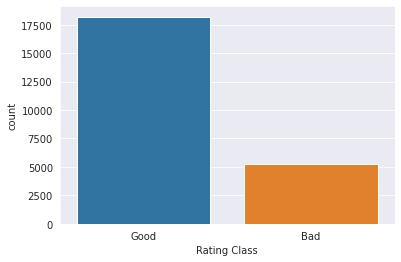

In [21]:
sns.set_style("darkgrid")
sns.countplot(df_sentiment['Rating Class'])

## it seems good rating are pretty on the higher side

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


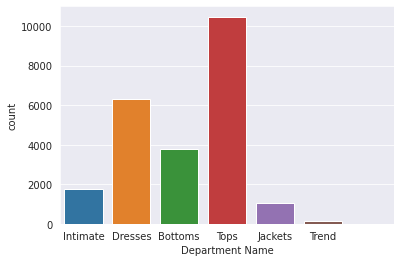

In [22]:
## seeing the trends for various departments to see the women clothing pattern
sns.set_style("darkgrid")
sns.countplot(df_sentiment['Department Name'])

## it seems tops is the highest selling department among women wear

In [25]:
## importing all the standrd libraries required to perform the task
import pandas as pd
import numpy as np

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing

In [26]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [27]:
# Encode labels in column 'species'
x_df = df_sentiment['Review Text']
y_df = df_sentiment['Rating Class']

In [28]:
## applying label encoder fit transform method on Rating Class
y = label_encoder.fit_transform(y_df)

In [29]:
## checking the values
y

array([1, 1, 0, ..., 0, 0, 1])

In [30]:
## importing all the standard NLP libraries used for feature extraction
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
# start text processing with vectorizer 
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(x_df)

<23486x14145 sparse matrix of type '<class 'numpy.int64'>'
	with 966529 stored elements in Compressed Sparse Row format>

In [32]:
freq_term_matrix = count_vectorizer.transform(x_df)
tfidf = TfidfTransformer(norm = "l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [33]:
# print shape of the tfidf 
tf_idf_matrix.shape

(23486, 14145)

In [34]:
## splitting data set into train test split 
x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix,y,test_size=0.20, random_state=0)

In [35]:
## Building a Regression Tree Model

###Logistic Regression

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
Accuracy = logreg.score(x_test, y_test)

print("Acurracy of the logistic regression model for the sentiment dataset: " + str(Accuracy*100) + "%")

Acurracy of the logistic regression model for the sentiment dataset: 87.24989357173266%


In [36]:
### Light Gradient Boosting Model (LGBM)

import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(x_train, y_train)

y_pred=clf.predict(x_test)


In [37]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print("Acurracy of the lgbm  model for the sentiment dataset: " + str(accuracy*100) + "%")
## print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Acurracy of the lgbm  model for the sentiment dataset: 86.71775223499361%


In [38]:
#### DECISION TREE ALGORITHM
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
## calculating accuracy
Accuracy = clf.score(x_test, y_test)

print("Acurracy of the DecisionTreeClassifier model for the sentiment dataset: " + str(Accuracy*100) + "%")

Acurracy of the DecisionTreeClassifier model for the sentiment dataset: 77.88420604512558%


In [39]:
### PASSIVE-AGGRESSIVE CLASSIFIER

from sklearn.metrics import accuracy_score
from sklearn.linear_model import PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(x_train,y_train)

 #Predict on the test set and calculate accuracy
y_pred=pac.predict(x_test)
score=accuracy_score(y_test,y_pred)

## printing accuracy with 2 decimal places 
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 84.42%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [40]:
###Naive Bayes Classifier"""

tf_idf_matrix=tf_idf_matrix.todense()

x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix,y,test_size=0.20, random_state=0)

from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  

classifier.fit(x_train, y_train)

# making predictions on the testing set
y_pred =classifier.predict(x_test)
 
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Gaussian Naive Bayes model accuracy(in %): 41.99659429544487


As we can see here Logistic Regression has high accuracy of 87.24% . 
So prefer to use this model.

In [ ]:
**********************************************************END********************************************************************************